In [1]:
""" 
Timinga nalysis.
building on line5 code. 

also other plots for CRCNS - e..g, example single trials.

[OBSOLETE] 3/10/21 - moved to analysis_TEMPLATE
"""

' \nTiminga nalysis.\nbuilding on line5 code. \n\nalso other plots for CRCNS - e..g, example single trials.\n\n[OBSOLETE] 3/10/21 - moved to analysis_TEMPLATE\n'

In [3]:
%load_ext autoreload
%autoreload 2

%cd ..

/data1/code/python/drawmonkey


In [4]:
from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.line2 import *
from analysis.modelexpt import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
from analysis.probedatTaskmodel import *


NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


## SINGLE TRIAL

In [5]:
fd = loadSingleDataQuick("Red", "201014", "lines6", 1)

-- loaded presaved data: /data2/animals/Red/201014/201014_151203_lines6_Red_1.pkl
got 919 total trials
NO TASKSETS FOUND!! (is ok as long as this is desired)
NO TASKSETS FOUND!! (is ok as long as this is desired)


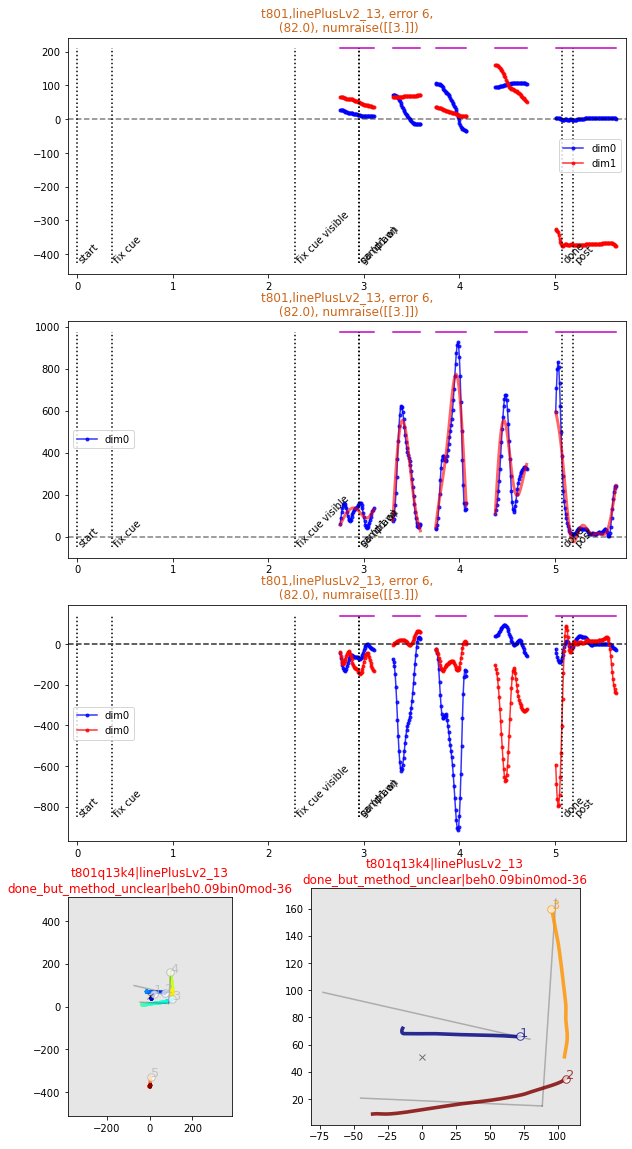

In [23]:
fig = plotTrialSingleOverview(fd, 801)
fig.savefig("/tmp/egfig.pdf")

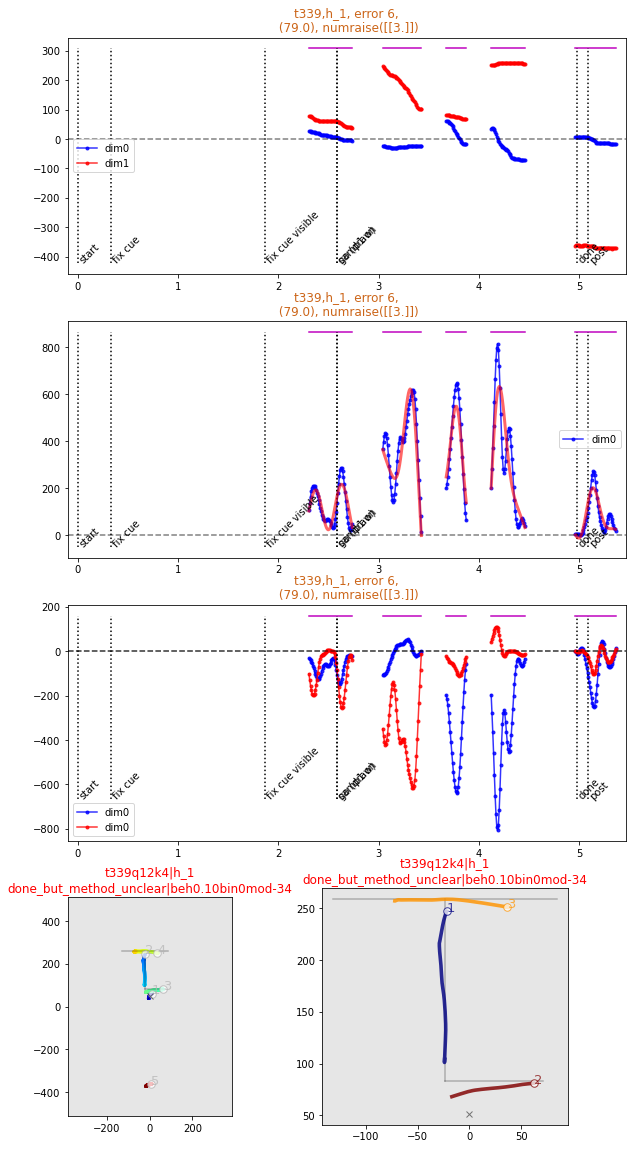

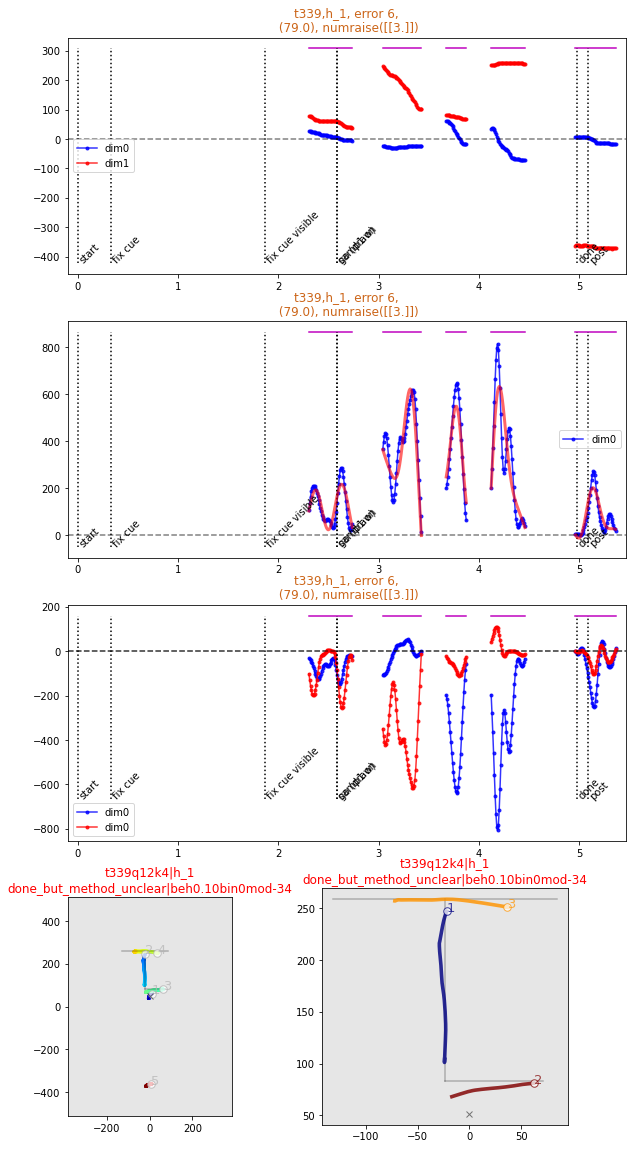

In [21]:
plotTrialSingleOverview(fd, 339)

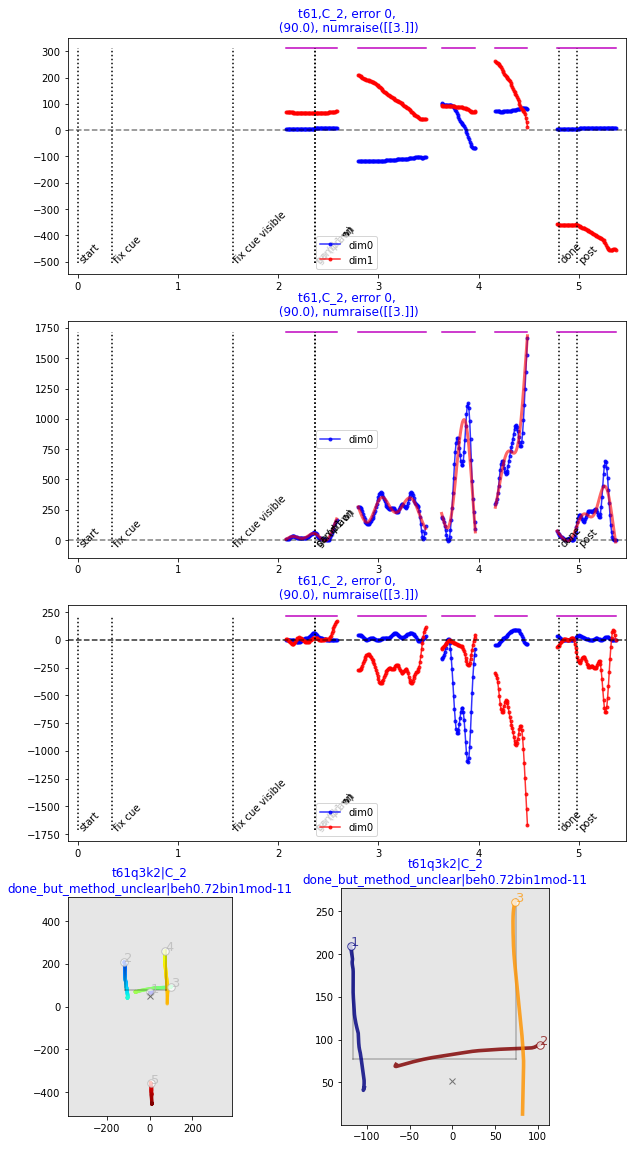

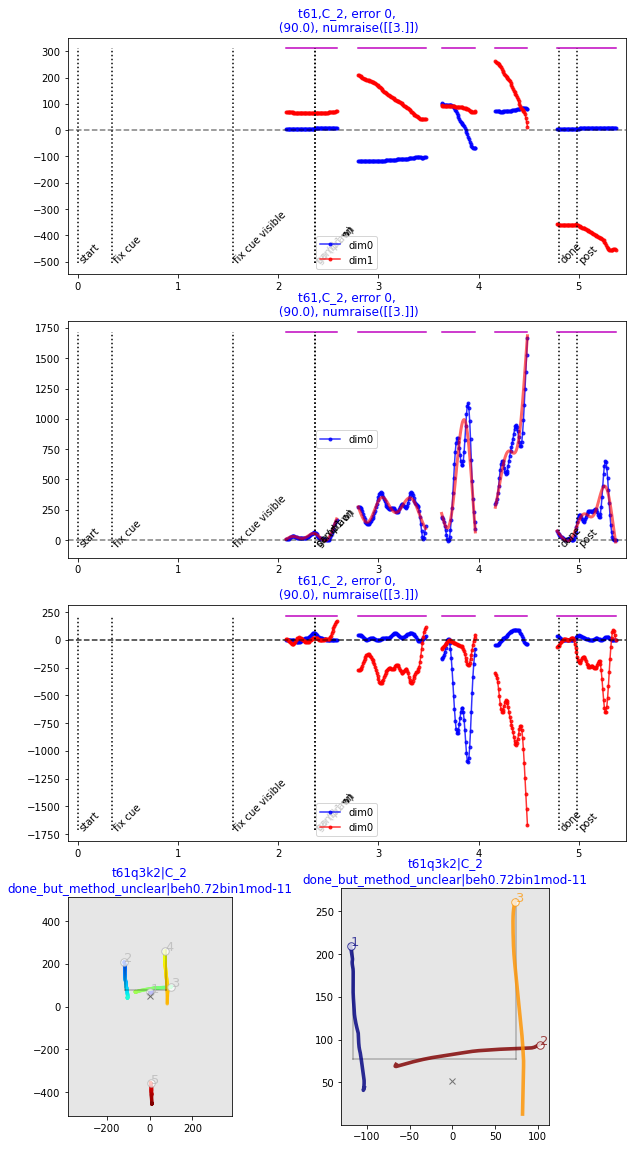

In [20]:
plotTrialSingleOverview(fd, 61)

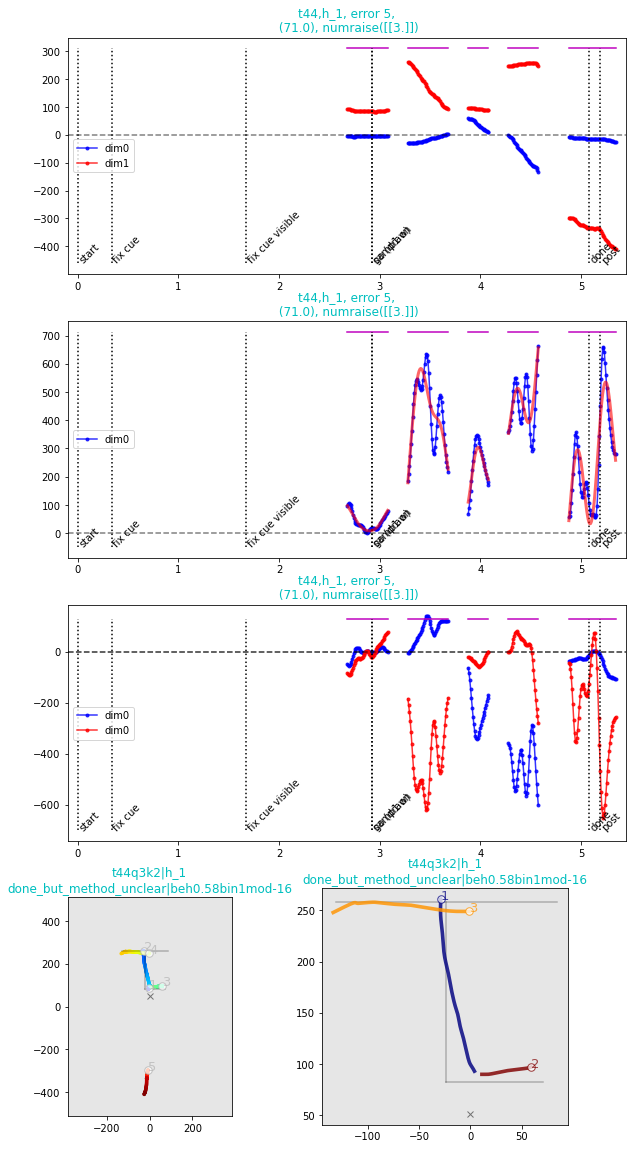

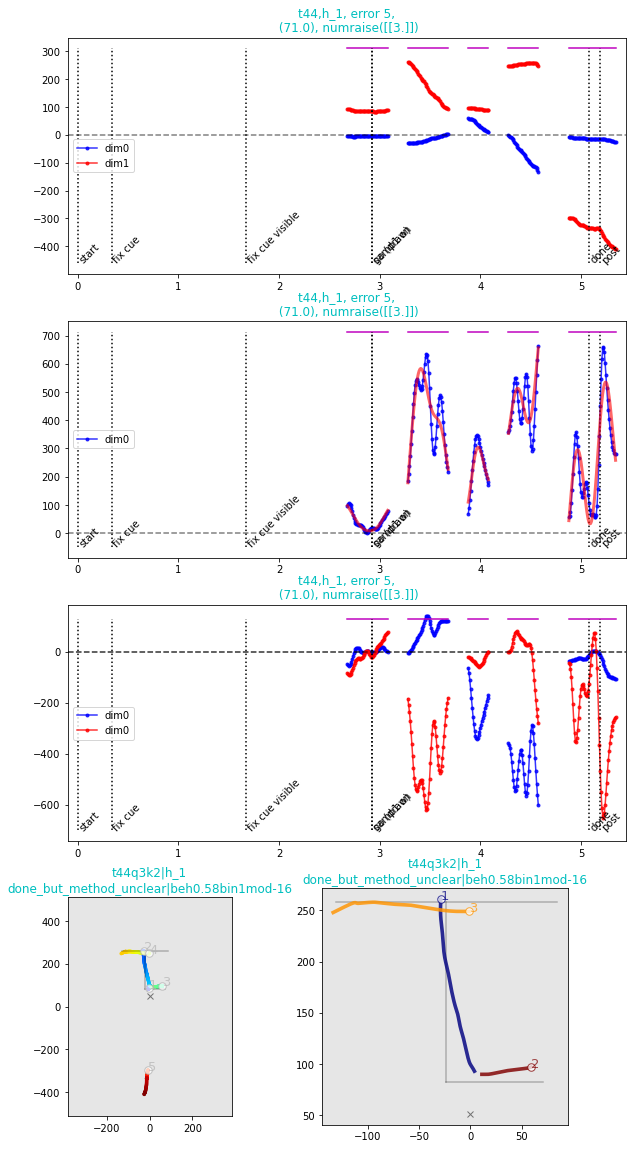

In [19]:
plotTrialSingleOverview(fd, 44)

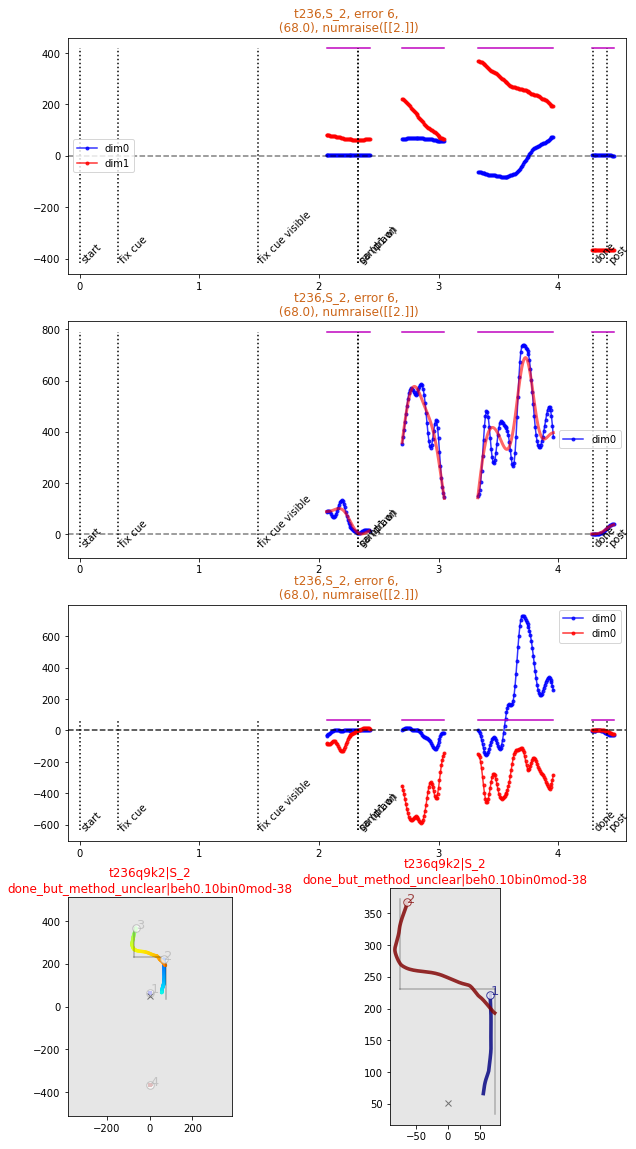

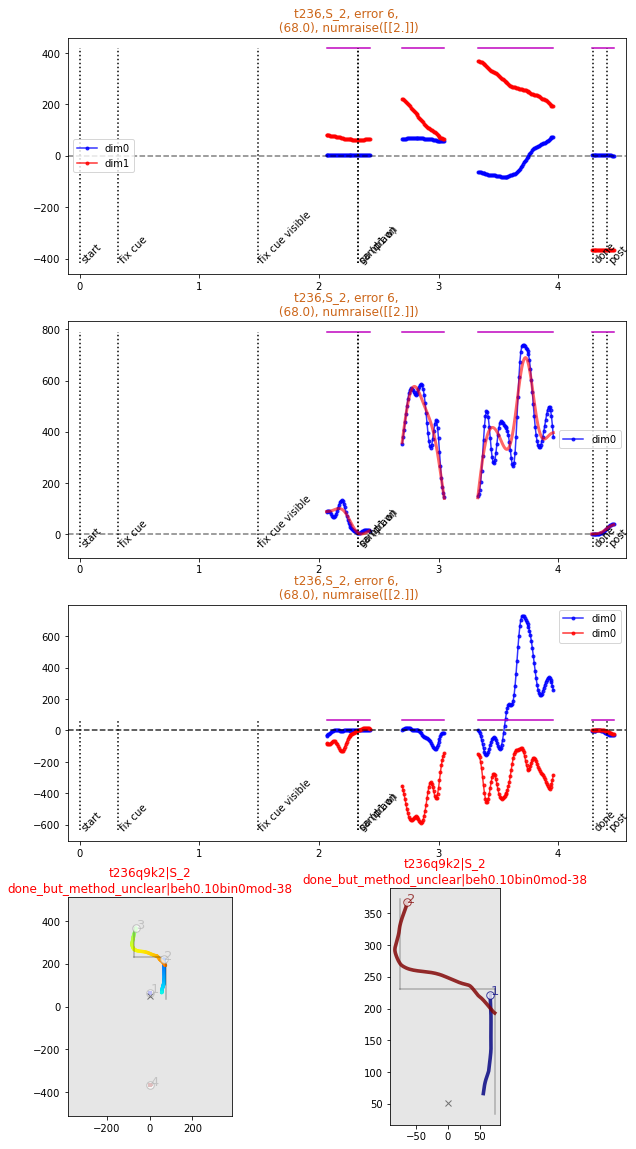

In [15]:
plotTrialSingleOverview(fd, 236)

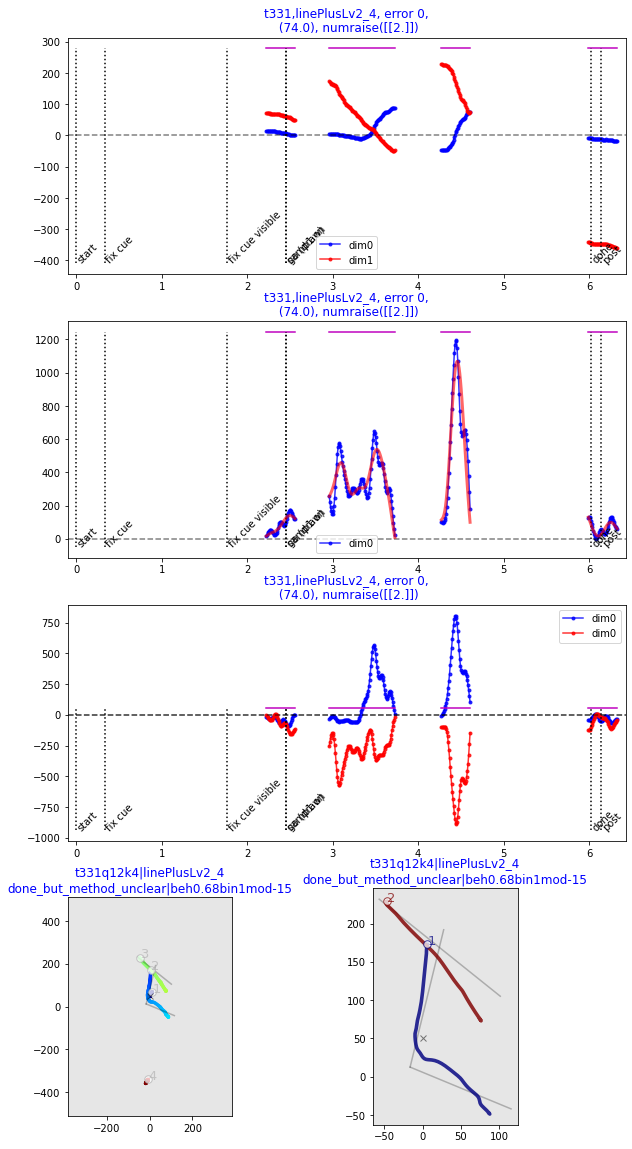

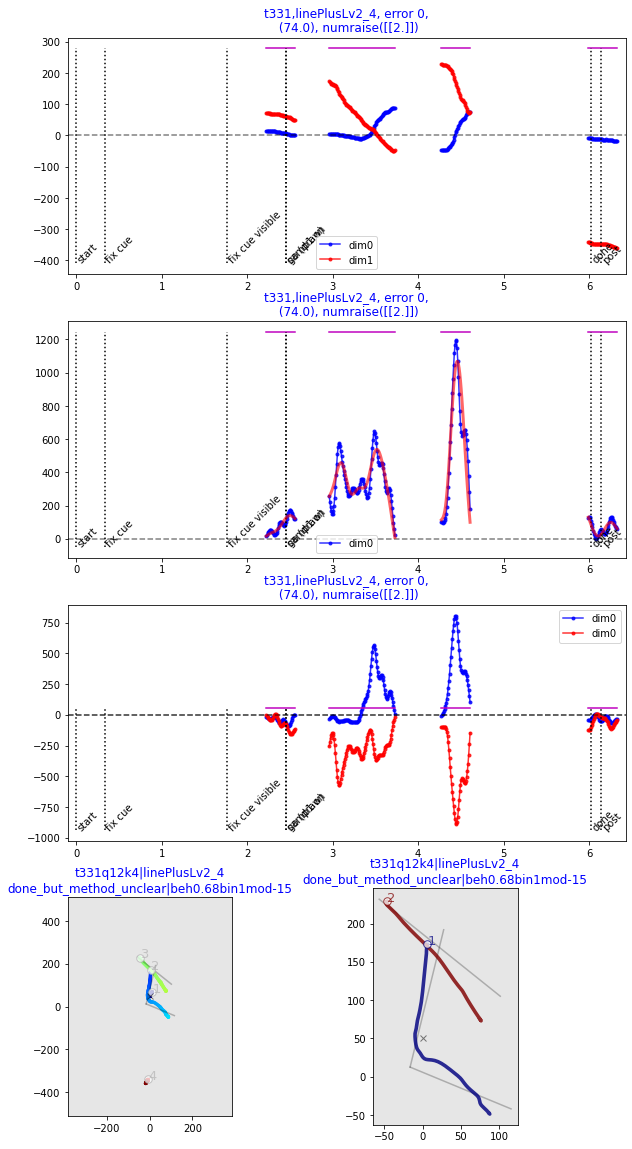

In [14]:
plotTrialSingleOverview(fd, 331)

# ACROSS-DAY ANALYSIS (MULTI ANIMAL)

## NOTE: moved to modelexpt.py

In [3]:
expt = "lines5"
animal = "Red"

In [4]:

FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
PROBEDAT = loadProbeDatWrapper(FD, MD, getnumstrokes=True)


This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}, 'expt': 'lines5'}

Getting these dates:
['200921', '200922', '200923', '200924', '200925', '200926', '200927', '200928', '200929', '200930', '201001']
- No h5 file for Red, 200921, lines5, 0 - returning None!
-- loaded presaved data: /data2/animals/Red/200921/200921_135553_lines5_Red_1.pkl
got 986 total trials
appending fd for sess 1
- No h

got 984 total trials
got 878 total trials
got 545 total trials
got 504 total trials
got 77 total trials
got 759 total trials
got 1134 total trials
got 1258 total trials
got 1055 total trials
got 1007 total trials
got 876 total trials
got 811 total trials


### TIMING, COMPARE DIFFERENCE CLASSES OF TASKS

# Compare new vs. old tasks..

In [17]:
P = ProbedatTaskmodel(PROBEDAT)

In [20]:
P.t(1)

{'animal': 'Red',
 'expt': 'lines5',
 'date': '200921',
 'session': 1,
 'trial': 48,
 'trial_day': 2,
 'kind': 'train',
 'unique_task_name': 'linePlusL_4-1-19354015',
 'task_stagecategory': 'linePlusL',
 'block': 1,
 'random_task': True,
 'probe': 0,
 'feedback_ver': '',
 'feedback_ver_prms': {},
 'constraints_to_skip': {},
 'prototype': 0,
 'saved_setnum': None,
 'tasknum': 4,
 'resynthesized': 0,
 'resynthesized_path': None,
 'resynthesized_trial': None,
 'resynthesized_setnum': None,
 'resynthesized_setname': None,
 'dist_total': -0.8506482284060406,
 'hausdorff': -0.3036567174125331,
 'frac_touched': 0.8111111111111111,
 'modelscore': -38.28475751022213,
 'modelcomp': -0.28545459680136376,
 'numstrokes': -1.0,
 'tval': 0.4541111111111111,
 'epoch': 1,
 'taskgroup': 'train_random',
 'insummarydates': False,
 'nstrokesactual': 3}

In [21]:
set([P.t(t)["taskgroup"] for t in P.getIndsTrials()])

{'G2', 'G3', 'test_random', 'train_fixed', 'train_random'}

In [24]:

getTrialsOnsOffs(P.fd(1), P.t(1)["trial"])
    

    

([7.608, 8.264, 9.48], [8.064, 8.8, 9.648])

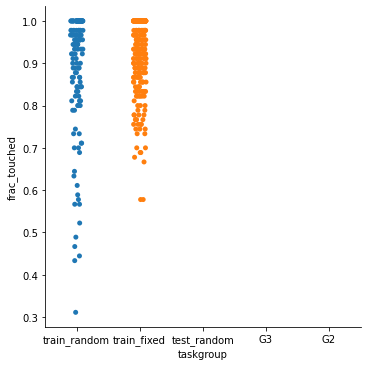

In [28]:
df = P.pandas()
import seaborn as sns

sns.catplot(data=df, x="taskgroup", y="frac_touched")

In [30]:
for p in P.Probedat:
    fd = p["filedata"]
    t = p["trial"]
    ontime = getTrialsOnsOffs(fd, t)[0][0]
    p["ontime"] = ontime
    

(0.0, 10.0)

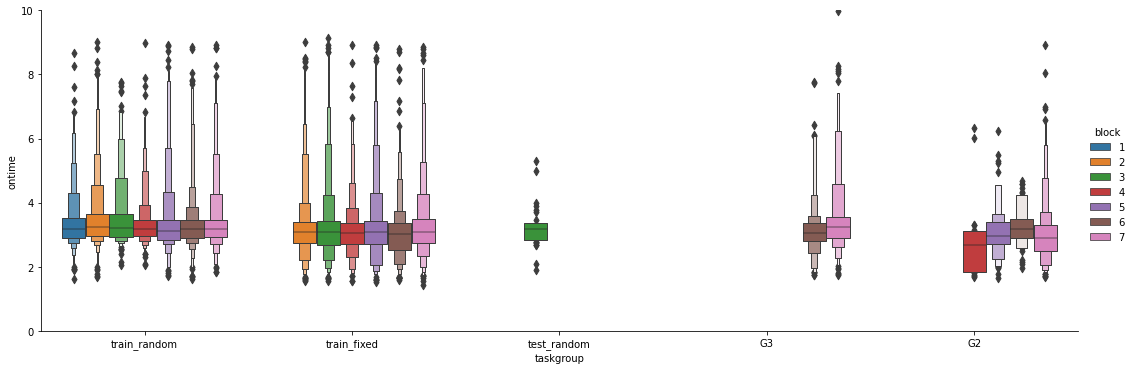

In [39]:
df = P.pandas()
import seaborn as sns

sns.catplot(data=df, x="taskgroup", y="ontime", kind="boxen",  hue="block", aspect=3)
plt.ylim([0, 10])


(0.0, 10.0)

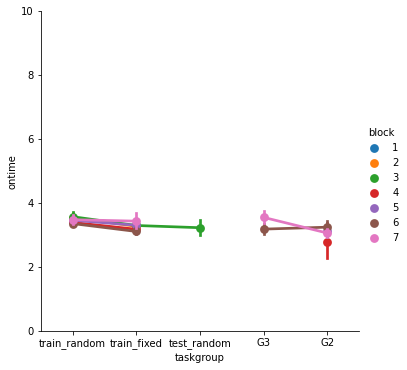

In [36]:
sns.catplot(data=df, x="taskgroup", y="ontime", kind="point", hue="block")
plt.ylim([0, 10])


### OLD - SCRATCH

In [ ]:
# Plot same task across days
for animal in ["Red", "Pancho"]:
    
    FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
    PROBEDAT = loadProbeDatWrapper(FD, MD, getnumstrokes=True)

    # saving dir
    SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_modelexpt_multsession/{expt}/multday_{animal}_{sdate}_to_{edate}"
    import os
    os.makedirs(SAVEDIR, exist_ok=True)
    print(f"saving at {SAVEDIR}")

    # get all fixed tasks of a particular kind
    kindlist = set([P["kind"] for P in PROBEDAT if P["random_task"]==False])
    task_per_kind = {}
    for kind in kindlist:
        tasklist = set([P["unique_task_name"] for P in PROBEDAT if P["kind"]==kind])
        task_per_kind[kind]=sorted(tasklist)

    print("tasks per kind found")
    for k, v in task_per_kind.items():
        print("----")
        print(f"=={k}")
        [print(vv) for vv in v]


    ## PLOT - all trials, 2d grid sorted by date and task category

    # == get all task stages (catregories) that have data across dates

    # only keep data for fixed tasks.
    PROBEDATthis = [P for P in PROBEDAT if P["random_task"]==False]
    datelist = sorted(set([P["date"] for P in PROBEDATthis]))

    # # for each category, check that has data across days
    # if False:
    #     # not done - currently taking all stages
    #     for stage in stagelist:
    #         datelist = set([P["date"] for P in PROBEDATthis if P["task_stagecategory"] == stage])

    # for each stage, make a 2d grid plot (date x task)
    if "alltrials" in thingstoplot:
        # all categories that have fixed tasks
        stagelist = set([P["task_stagecategory"] for P in PROBEDATthis if P["random_task"]==False])
        for stage in stagelist:
            plotalltrials(PROBEDATthis, fdlist, stage, datelist, tasklist)

    # ==== PLOT ALL TRIALS
    if "egtrials" in thingstoplot:
        if debug:
            # making plots for lab meeting..
            tasklist = set([P["unique_task_name"] for P in PROBEDATthis if P["random_task"]==False
               and (P["task_stagecategory"] in ["LplusL", "2linePlusL", "3linePlusL"] or "linePlusLv2_51" in P["unique_task_name"])])
        else:
            tasklist = set([P["unique_task_name"] for P in PROBEDATthis if P["random_task"]==False])
        NMAX = 20 # trials to plot, starting from 1st trial int he day
        for task in tasklist:

            PD = [P for P in PROBEDATthis if P["random_task"]==False and P["unique_task_name"]==task]

            for reverse in [False, True]:
                # -- task presentation num as column
                for P in PD:
                    P["idx_today_uniquetask"] = None
                PD, countlist = probeDatIndexWithinDay(PD, task, reverse_order=reverse);

                # -- how many examples to plot?
                ntoplot = min((max(countlist), NMAX))

                # -- Plot 2d grid, separated by days
                CAT1 = ["date", datelist]
                CAT2 = ["idx_today_uniquetask", range(ntoplot)]
                fdlist = None

                # == 1) All behavior trials, all strokes overlaid
                plotargs = {"zoom":True, "plotver":"order", "markersize":8, "alpha":0.7}
                plot_task_last_col = True
                ver = "beh"

                fig = plotTrial2dGrid(PD, fdlist = fdlist, cat1 = CAT1, cat2 = CAT2, ver=ver, 
                                      plotargs=plotargs, plot_task_last_col=plot_task_last_col);
                if reverse:
                    fig.savefig(f"{SAVEDIR}/egtrials_datebyexample_revchronorder_{task}.pdf")
                else:
                    fig.savefig(f"{SAVEDIR}/egtrials_datebyexample_chronorder_{task}.pdf")

        plt.close("all")

## 9/22/20 - what I now think as important plots


2) Analyze curvature as a measurement of bendiness



1) In general, use stroke model to assign probabilites for each strok for being of certain class (use strokModel)


In [ ]:
# from analysis.line2_strokmodelfits import *
# def modelResultsGetter(PROBEDAT, model="spatial", fit_tstamp = "200922_093340_lines2"):
#     """ given PROBEDAT, return a function that you can use to pull out model 
#     results for a given trial/stroke
#     - model and fit_tstamp index a particular run of model fitting.
#     RETURNS:
#     - resultGetter, a function that takes in specific details of expt (down to level
#     of strokenum) and extracts, from processed dataframe, model fit results.
#     NOTE: can fail silently, in that if dosent find something, will return a None.
#     should modify so that is known what should or should not exist.
#     """
    
#     # 1) Load previously saved strok model fits.
# #     model = "spatial"
# #     fit_tstamp = "200922_093340_lines2"

#     datlist = set([(P["animal"], P["session"], P["date"],  P["expt"]) for P in PROBEDAT])

#     # for each combo, load and put in a dict, so that can align trials later.
#     MODELDAT = []
#     for dat in datlist:
#         try:
#             strokdat, DF, DF2, fd = \
#                 postProcess(dat[0], dat[1], dat[2], dat[3], fit_tstamp=fit_tstamp, model=model,ploton=False)

#             print(f"** GOOD! Found for this dat: {dat}")
#             MODELDAT.append({
#                 "animal":dat[0],
#                 "date":dat[2],
#                 "expt":dat[3],
#                 "session":dat[1],
#                 "DF":DF,
#                 "DF2":DF2
#             })
#         except FileNotFoundError as err:
#             print(err)
#             print('SKIPPING')
#             continue

    
#     def resultGetter(animal, date, expt, session, trial, strok_num):
#         """function to extract model stats for a given trial/stroke, 
#         given the MODELDAT listy of dicts
#         - returns None if can't find for whatever reason
#         By default, extracts the model1/model2 score for the trial, which is 
#         one df row. could also choose to extract one row for each model."""

#         for M in MODELDAT:
#             if M["animal"]==animal and M["date"]==date and M["expt"]==expt and M["session"]==session:
#                 DF = M["DF"]
#                 DF2 = M["DF2"]

#                 if False:
#                     DFthis = DF[(DF["trial"]==trial) & (DF["strok_num_0"]==strok_num)]
#                 else:
#                     DFthis = DF2[(DF2["trial"]==trial) & (DF2["strok_num_0"]==strok_num)]

#                 if len(DFthis)==0:
#                     return None
#                 else:
#                     return DFthis
#         if False:
#             print("DID NOT FIND THIS DATA!")
#         return None
    
# #     extractDatForStroke(MODELDAT, "Pancho", "200907", "lines2", 1, 10, 1)
#     return resultGetter

# # resultGetter = modelResultsGetter(PROBEDAT, model="spatial", fit_tstamp = "200922_093340_lines2")

# # resultGetter("Pancho", "200907", "lines2", 1, 10, 1)


# STROKE STATISTICS - ACROSS ANIMALS



# SINGLE ANIMAL


In [ ]:
from pythonlib.tools.datetools import getDateList

sdate = 200902
edate = 200907
datelist = getDateList(sdate, edate)

expt = "lines2"
animal = "Pancho"
    
dattoget = []
for d in datelist:
    dattoget.append([expt, animal, d])

FD = loadMultData(dattoget)

# saving dir
SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_line2_090720/multday_{animal}_{sdate}_to_{edate}"
import os
os.makedirs(SAVEDIR, exist_ok=True)
print(f"saving at {SAVEDIR}")

# ==== Flatten all trials across days x animals
# for each trial collect relevant information
from analysis.line2 import PROBEDATfromFD

PROBEDAT = PROBEDATfromFD(FD)

# CODE DEVElOPMENT

In [ ]:
## WAYS TO QUANTIFY VARIABILITY OF STROKES
# 1) covariance structure (plto as clouds on eac point)
# 2) same, but only onset and offset, which makes thingse asier
# 3) resampling
# 4) plot x and y separately?
# 5) align onto a 1d-axis, which is along the task (difficult to do... prob ignore)

# lthere are tasks that are fixed in one set of days but random in other./`

In [ ]:
## Not just motor habit - order often differs (both of stroke and of direction within stroke).

# but becomes more and more like motor habit as more practice:
# - correalted timecourses.


In [ ]:
# 1) clean strokes DONE
# 2) mean 1st, second, etc DONE
# 3) seaprate by stroke num DONE
# 4) plot 1st N trials each day DONE
# 5) plot N (matched)


## score behavior


# plot one specific task

In [ ]:
# Learning - same task over time/days


In [ ]:
# Collect all cases where same task is done in different contexts:
# 1) Same animal, diff training
# 2) Diff animal, diff training
# 3) Diff animal, same training (might not be any of this)



In [ ]:
# During 2-stroke, stop after secind stroke?

# Trial end after lift > N seconds? Plot timing distryubitnos./

In [ ]:
# Can decode character?


In [ ]:
# Get more stereotyped with practice 
# seems clear from psychometric tasks

In [ ]:
# CHECK ANALYSES TO DO IN SPREADSHEET

## structure of variability

1. same task, different primitives
2. same task, same primitives, different order.
3. relates to psychometric functions - what stimulus features drive this variability?
4. reduction in variability over experiences.
5. motor-level variability, in timing and kinematics

[note: all of these maybe addressed by done-button verson, where seems to be more variability
- also, variability of number of strokes]

IMPoRTANT: if question is what drives structure of variablity, answer might be depends on prior knowledge. Goal of analyses is to see whether structure of variability influenced by this prior knowledge.

## motor analyses

1) motor-level invariance:
    same stroke different tasks
    same bigram strokes diff tasks
    
    the above, but same task different parses
    Goal:
        if so, then can do modeling of primitives?
        if so, then useful for neural recordings?
        

## EMAIL TO SELF - good outline


    A) First analysis just show that is copying task correctly.
    - shuffle across task categories. shuffle within task categories.
    - better or worse given different models?


    B) Second, look at compositional structure
    Different analyses to look at structure difference for
    compositionality v1 (strokes):

    1) Stroke statistics:
    - length, straightness, etc.
    - bag of strokes, across all tasks, showing that depend on training. compare to models (ground truth (two models) and spline fit).

    - [spline fit model] - THINK ABOUT THIS - not obvious if would work, since here is compositionality v1.

    - task by task, ask whether beahvior matches model. shuffle tasks.


## STROKE STATISTICS


### 1) Extract one datapoint for each stroke (flat across trials)

In [ ]:
# # 1) Load data across days
# from pythonlib.tools.datetools import getDateList
# from analysis.line2 import PROBEDATfromFD
# import seaborn as sns
# import pandas as pd
# from analysis.line2 import probedat2strokefeats

# sdate = 200902
# edate = 200907
# datelist = getDateList(sdate, edate)

# expt = "lines2"

# # === METADAT ABOUT EXPERIMENT
# task_train_test = {
# 'probe1_liketrain':"train",
# 'probe1_nostrokeconstraint':"train",
# 'probe3':"test",
# 'probe3_hdpos':"test",
# 'train':"train"}
        
# matchedstrokes = [0,1] # these strokes are aggregated on each day. expect these to be comaprable across days.

# # ==== STROKES MOTOR MODEL PARAMS
# strokmodel_kind='spatial'
# strokmodel_tstamp = '200922_093340_lines2'

# # for animal in ["Pancho", "Red"]:
# for animal in ["Pancho"]:
    
#     dattoget = []
#     for d in datelist:
#         dattoget.append([expt, animal, d])
        
#     FD = loadMultData(dattoget)

#     # saving dir
#     SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_line2_090720/multday_{animal}_{sdate}_to_{edate}"
#     import os
#     os.makedirs(SAVEDIR, exist_ok=True)
#     print(f"saving at {SAVEDIR}")

#     # ==== Flatten all trials across days x animals
#     # for each trial collect relevant information
#     PROBEDAT = PROBEDATfromFD(FD)
    
    

#     # ==== EXTRACT STROKE MODEL RESULTS
#     modResGetter = modelResultsGetter(PROBEDAT, model=strokmodel_kind, 
#                                       fit_tstamp = strokmodel_tstamp)

#     for traintest in ["train", "test", "bothtraintest"]:
# #     for traintest in ["test"]:
#         for only_first_last_trials in [False, True]:
#     #         = True # then gets last trial of epoch 1 and first trial of epoch 2

#             if only_first_last_trials:
#                 # then should get all trials to make sure not miss any
#                 from pythonlib.tools.datetools import getDateList
#                 DATELIST = getDateList("200902", "200907")

#                 datecategories = {
#                     "200902":1, 
#                     "200903":1,
#                     "200904":2,
#                     "200905":2,
#                     "200906":2,
#                     "200907":2}
#             else:
#                 DATELIST = ["200902", "200903", "200906", "200907"]
#                 datecategories = {
#                     "200902":1, 
#                     "200903":1,
#                     "200906":2,
#                     "200907":2}

#             only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.
#             strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, DATELIST, only_shared_tasks=only_shared_tasks)

#             # ==== add model results to strokfeats
#             if False:
#                 ## assign model results to each individual stroke
#                 # [SCRATCH HERE]
#                 for s in strokfeats:

#                     s["mod_res"] = modResGetter(animal, date=s["date"], expt=expt, session=s["session"], trial=s["trial"], 
#                                                 strok_num=s["strokenum"])


#                 SF = pd.DataFrame(strokfeats)
#                 SF = pd.DataFrame([s for s in strokfeats if s["mod_res"] is None])
#                 sns.catplot(x="date", y="distance", data=SF, height=20)

#                 SF = pd.DataFrame([s for s in strokfeats if s["mod_res"] is not None])
#                 sns.catplot(x="date", y="distance", data=SF, height=20)

            
#             #### move all below into plotting function
#             # === ADD MODEL RESULTS
#             k = "Lstrokeindex"
#             if k=="Lstrokeindex":
#                 kactual = "0/(0+1)"
#             for s in strokfeats:
#                 mod_res = modResGetter(animal, date=s["date"], expt=expt, session=s["session"], trial=s["trial"], 
#                                             strok_num=s["strokenum"])
#                 if mod_res is not None:
#                     s[k] = mod_res[kactual].values[0]
#                 else:
#                     s[k] = np.nan


#             ## CONVERT TO DATAFRAME FOR PLOTTING
#             SF = pd.DataFrame(strokfeats)

#             ## APPEND columns refelcting experimental structure
#             from pythonlib.tools.pandastools import applyFunctionToAllRows

#             # --- aggregate over strokes of a desired index
#             F = lambda x:x["strokenum"] in matchedstrokes
#             SF = applyFunctionToAllRows(SF, F, newcolname="keepstroke")

#             # --- aggregate over strokes of a desired index
#             F = lambda x:datecategories[x["date"]]
#             SF = applyFunctionToAllRows(SF, F, newcolname="epoch")

#             # --- call each task either test or train
#             F = lambda x:task_train_test[x["task_kind"]]
#             SF = applyFunctionToAllRows(SF, F, newcolname="traintest")


#             if traintest in ["train", "test"]:
#                 SF = SF[SF["traintest"]==traintest]
#             elif traintest=="bothtraintest":
#                 SF = SF

#             # - only keep tasks that have at least one datapoint in epoch1 and 2
#             epochs_to_check = list(set([d for d in datecategories.values()]))
#             def F(x, epochs_to_check = epochs_to_check):
#                 """ True if has data for all epochs"""
#                 checks  = []
#                 for ep in epochs_to_check:
#                     checks.append(ep in x["epoch"].values)
#                 return all(checks)
#             SF = SF.groupby(["task"]).filter(F)

#             # == only keep if includes model results
#             SF = SF[~np.isnan(SF[k])]




#             #  ==== ONLY INCLUDE LAST (OF FIRST EPOCH) AND FIRST (OF LAST EPOCH) TRIALS
#             if only_first_last_trials:
#                 # -- get last trial for first epoch
#                 tmp = SF[SF["epoch"]==1]
#                 tmp = tmp[tmp.groupby(["task", "epoch"])["datetime"].transform(max) == tmp["datetime"]]


#                 # -- get first trial of last epoch
#                 tmp2 = SF[SF["epoch"]==2]
#                 tmp2= tmp2[tmp2.groupby(["task", "epoch"])["datetime"].transform(min) == tmp2["datetime"]]


#                 # -- combine in a new dataframe
#                 SF = pd.concat([tmp, tmp2])

#             # === MAKE SAVE DIRECTORY
#             if only_first_last_trials:
#                 SAVEDIRTHIS = f"{SAVEDIR}/strokefeatures_firstlasttrials_{traintest}"
#                 import os 
#                 os.makedirs(SAVEDIRTHIS, exist_ok=True)
#             else:
#                 SAVEDIRTHIS = f"{SAVEDIR}/strokefeatures_alltrials_{traintest}"
#                 import os 
#                 os.makedirs(SAVEDIRTHIS, exist_ok=True)    


#             # --- plot date for each task
#             #             from pythonlib.tools.snstools import rotateLabel
#             fig = plt.figure(figsize=(15,10))
#             ax = sns.scatterplot(data=SF, x="date", y="task", hue="epoch")
#             if only_first_last_trials:
#                 plt.title("last trial (first epoch) and first trial (last epoch)")                  
#             else:
#                 plt.title("all trials")
#             # ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#             fig.savefig(f"{SAVEDIRTHIS}/overview_timeline.pdf")

#             # reget new tasklist
#             TASKLIST = sorted(set(SF["task"].values))

#             # =========== PLOT - one plot per task
#             for task in TASKLIST:
#                 SFthis = SF.loc[SF["task"]==task]
#             #     SF = pd.DataFrame([s for s in strokfeats if s["task"]==task])

#                 # -- PLOT
#                 fig = sns.pairplot(SFthis, vars = ["strokenum", "circularity", "distance", k, "epoch"], hue="date")
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-1.pdf")
#                 fig = sns.pairplot(SFthis, vars = ["strokenum", "circularity", k, "distance"], hue="epoch")
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-2.pdf")
#                 fig = sns.catplot(data=SFthis, x="epoch", y="distance", col="strokenum", hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-3.pdf")
#                 fig = sns.catplot(data=SFthis, x="epoch", y="circularity", col="strokenum", hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-4.pdf")
#                 fig = sns.catplot(data=SFthis, x="epoch", y=k, col="strokenum", hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-5.pdf")

#                 # -- PLOT, aggregating over first N strokes.
#                 SF2 = SFthis.loc[SFthis["keepstroke"]==True]
#                 fig = sns.pairplot(SF2, vars = ["circularity", "distance", k, "epoch"], hue="date")
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-1.pdf")
#                 fig = sns.pairplot(SF2, vars = ["circularity", "distance",  k], hue="epoch")
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-2.pdf")
#                 fig = sns.catplot(data=SF2, x="epoch", y="distance", hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-3.pdf")
#                 fig = sns.catplot(data=SF2, x="epoch", y="circularity", hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-4.pdf")
#                 fig = sns.catplot(data=SF2, x="epoch", y=k, hue="date", jitter=True, aspect=0.5)
#                 fig.savefig(f"{SAVEDIRTHIS}/pairplot_{task}-aggregNstrokes-5.pdf")

#                 plt.close("all")


#             ## ==== Summary across tasks
#             # aggregate: for each task, get one value for epoch 1, one value for epoch 2
#             # (aggreagte over stroke and days)

#             # -- 1) Do aggregation
#             from pythonlib.tools.pandastools import aggregGeneral
#             group = ["task", "epoch"]
#             values = ["circularity", "distance", k]
#             SFagg = SF.loc[SF["keepstroke"]==True]
#             SFagg = aggregGeneral(SFagg, group, values, aggmethod=["mean", "median"])

#             # -- 2) Plot
#             for y in ["distance_median", "circularity_median", f"{k}_median"]:
#                 from pythonlib.tools.snstools import rotateLabel

#                 fig = sns.catplot(x ="task", y=y, data=SFagg, hue="epoch", aspect=3)
#                 rotateLabel(fig)
#                 fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-1.pdf")

#             #     sns.catplot(data=SFagg, x="epoch", y=y)
#             #     sns.catplot(data=SFagg, x="epoch", y=y, kind="point")
#                 fig = plt.figure(figsize=(10,5))

#                 plt.subplot(121)
#                 for task in set(SFagg["task"]):
#                     sns.lineplot(data=SFagg.loc[SFagg["task"]==task], x="epoch", y=y, color="k", alpha=0.5)
#                 sns.lineplot(data=SFagg, x="epoch", y=y)

#                 plt.subplot(122)
#                 Y = SFagg.pivot(index="task", columns="epoch", values=y)
#                 Y = pd.DataFrame(Y.to_records())
#             #         fig = plt.figure(figsize=(5,5))
#                 sns.scatterplot(data =Y, x="1", y="2")
#                 plt.xlabel("epoch")
#                 plt.ylabel("epoch")

#                 fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-2.pdf")

#                 # --
#                 fig = sns.pairplot(SFagg, vars = ["circularity_median", "distance_median", f"{k}_median"], hue="epoch", height=5)
#                 fig.savefig(f"{SAVEDIRTHIS}/summary_aggregStrokesDates-{y}-3.pdf")

## plot metadat across days


In [ ]:

# for animal in ["Pancho", "Red"]:
    
#     dattoget = []
#     for d in datelist:
#         dattoget.append([expt, animal, d])
        
#     FD = loadMultData(dattoget)

#     # saving dir
#     SAVEDIR = f"{FD[0]['fd']['params']['figuredir_notebook']}/analysis_line2_090720/multday_{animal}_{sdate}_to_{edate}"
#     import os
#     os.makedirs(SAVEDIR, exist_ok=True)
#     print(f"saving at {SAVEDIR}")

#     # ==== Flatten all trials across days x animals
#     # for each trial collect relevant information
#     PROBEDAT = PROBEDATfromFD(FD)

#     # then should get all trials to make sure not miss any
#     from pythonlib.tools.datetools import getDateList
#     DATELIST = getDateList("200902", "200907")

#     datecategories = {
#         "200902":1, 
#         "200903":1,
#         "200904":2,
#         "200905":2,
#         "200906":2,
#         "200907":2}

#     only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.

#     task_train_test = {
#     'probe1_liketrain':"train",
#     'probe1_nostrokeconstraint':"train",
#     'probe3':"test",
#     'probe3_hdpos':"test",
#     'train':"train"}

#     matchedstrokes = [0,1] # these strokes are aggregated on each day. expect these to be comaprable across days.

#     only_shared_tasks = False # not needed, since will filter below to make sure in both epochs.
#     strokfeats, TASKLIST = probedat2strokefeats(PROBEDAT, DATELIST, only_shared_tasks=only_shared_tasks)

#     ## CONVERT TO DATAFRAME FOR PLOTTING
#     SF = pd.DataFrame(strokfeats)

#     ## APPEND columns refelcting experimental structure
#     from pythonlib.tools.pandastools import applyFunctionToAllRows

#     # --- aggregate over strokes of a desired index
#     F = lambda x:x["strokenum"] in matchedstrokes
#     SF = applyFunctionToAllRows(SF, F, newcolname="keepstroke")

#     # --- aggregate over strokes of a desired index
#     F = lambda x:datecategories[x["date"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="epoch")

#     # --- call each task either test or train
#     F = lambda x:task_train_test[x["task_kind"]]
#     SF = applyFunctionToAllRows(SF, F, newcolname="traintest")



#     fig1 = sns.catplot(x="date", y="task_category", hue="random_task", data=SF, aspect=3, row_order=sorted(set(SF["task_category"])))
#     fig2 = sns.catplot(x="date", y="task_category", hue="random_task", row="traintest", data=SF, aspect=3)

#     # for fixed tasks only
#     # sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
#     #             height=10, aspect=1, row_order=sorted(set(SF["task"])))
#     fig3 = sns.catplot(x="date", y="task", hue="task_category", row="traintest", data=SF[SF["random_task"]==False], 
#                 height=10, aspect=1)
    
#     fig1.savefig(f"{SAVEDIR}/overview-1.pdf")
#     fig2.savefig(f"{SAVEDIR}/overview-2.pdf")
#     fig3.savefig(f"{SAVEDIR}/overview-3.pdf")
    


In [ ]:
# # == 1) For each day, plot tasks sorted by category.

# for date in DATELIST:
#     print(f"======= {date}")
#     traintaskcats = sorted(set([P["task_stagecategory"] for P in PROBEDAT if P["date"]==date]))
#     for cat in traintaskcats:
#         print(f"--- {cat}")
#         for RANDOM in [True, False]:
#             tasknames = sorted(set([P["unique_task_name"] for P in PROBEDAT
#                               if P["date"]==date
#                               and P["random_task"]==RANDOM
#                                    and P["task_stagecategory"]==cat]))
#             if len(tasknames)==0:
#                 continue
#             if RANDOM:
#                 print("-RANDOM")
#             else:
#                 print("-FIXED")
#             if len(tasknames)>15:
#                 print(f"found {len(tasknames)} tasks, eg {tasknames[0]}")
#             else:
#                 print(tasknames)
# #         assert False
                          
    
    
    
    

 



## Plot all tasks (no behavior)


IN PROGRESS - not sure if this is good

In [ ]:
# ************** PLOT ALL FIXED TASKS (collect across days)
for TRAINTEST in ["train", "test"]:

    # then plot all
    tasknames = sorted(set([P["unique_task_name"] for P in PROBEDAT
                      if P["random_task"]==False
                            and task_train_test[P["kind"]]==TRAINTEST]))

    # get one index per taskname
    fdlist = []
    triallist =[]
    titlelist = []
    for task in tasknames:
        fdlist.append([P["filedata"] for P in PROBEDAT
                        if P["unique_task_name"]==task][0])
        triallist.append([P["trial"] for P in PROBEDAT
                        if P["unique_task_name"]==task][0])
        titlelist.append(task)
    print(titlelist)

    fig = plotMultTrialsSimple(fdlist, trials_list=triallist, rand_subset=None, 
                               empty_title=False, zoom=True, plot_fix=True, alpha=1, titles=titlelist,
                        plotargs={"plot_task_stimulus":True, 
                                "plot_drawing_behavior":False, "nakedplot":True,
                               })
    fig.savefig(f"{SAVEDIR}/alltasks_fixed_alldays_{TRAINTEST}.pdf")

    
    
# *** FOR EACH DAY, PLOT SUBSET OF RANDOM TASKS.
TRAINTEST = "train"
for date in DATELIST:
    print(f"======= {date}")
    traintaskcats = sorted(set([P["task_stagecategory"] for P in PROBEDAT 
                                if P["date"]==date
                               and P["random_task"]==True
                               and task_train_test[P["kind"]]==TRAINTEST]))
    for cat in traintaskcats:
        print(f"--- {cat}")
        
        # then just plot example tasks
        fdlist = [P["filedata"] for P in PROBEDAT
                          if P["date"]==date
                          and P["random_task"]==True
                        and P["task_stagecategory"]==cat
                 and task_train_test[P["kind"]]==TRAINTEST]
        triallist = [P["trial"] for P in PROBEDAT
                          if P["date"]==date
                          and P["random_task"]==True
                        and P["task_stagecategory"]==cat
                 and task_train_test[P["kind"]]==TRAINTEST]
        titlelist = [P["unique_task_name"] for P in PROBEDAT
                          if P["date"]==date
                          and P["random_task"]==True
                        and P["task_stagecategory"]==cat
                 and task_train_test[P["kind"]]==TRAINTEST]

        Nrand = 60
        fig = plotMultTrialsSimple(fdlist, trials_list=triallist, rand_subset=Nrand, 
                                   empty_title=False, zoom=True, plot_fix=True, alpha=1, titles=titlelist,
                            plotargs={"plot_task_stimulus":True, 
                                    "plot_drawing_behavior":False, "nakedplot":True,
                                   })
        fig.savefig(f"{SAVEDIR}/alltasks-random-{date}-{cat}-{TRAINTEST}.pdf")
        plt.close()


## === SCRATCH

In [ ]:
# ## FOR EACH TASK, PLOT THE DISTRIBUTIONS OF FEATURES, COMPARING TWO DAYS

# DATE1 = "200903"
# DATE2 = "200907"
# TASKlIST = "F_1-protype"

# # --- get flattened list of all stroks
# DAT = []
# for P in PROBEDAT:
#     if P["date"] in [DATE1, DATE2] and P["unique_task_name"]==TASK:
#         DAT.append(
#             {
#                 "date":str(P["date"]),
#                 "strokes":getTrialsStrokesByPeanuts(P["filedata"], P["trial"])
#             })

# ##############################
# strokesfeatures = strokeFeatures([D["strokes"] for D in DAT])
# for sf, D in zip(strokesfeatures, DAT):
#     D["features"] = sf
    
# strokfeats = flattenByStrok(DAT)
# strokfeats[0]


# # --- Plot distributions
# SF = pd.DataFrame(strokfeats)
# sns.pairplot(SF, vars = ["strokenum", "circularity", "distance"], hue="date", kind="reg")
# sns.pairplot(SF, vars = ["strokenum", "circularity", "distance"], hue="date")

# sns.catplot(data=SF, x="date", y="distance", hue="strokenum", jitter=True)

In [ ]:
def strokefeats2title(strokfeats):
    """strokfeats is a list of dicts.
    title is string, each row is a list element"""
    sfeat = strokfeats[0]
    s = ""
    for i, sfeat in enumerate(strokfeats):
        s=f"{s}\n[{i+1}]"
        for k, v in sfeat.items():
            if k!="strokenum":
                s=f"{s}-{k[:3]}"
                s=f"{s}({v:.2f})"
        #     s+=v
    return s
#     print(s)

In [ ]:
# === PLOT TRAILS STROKES ALONG WITH THEIR FEATURES

idxlist = [random.randrange(1, len(PROBEDAT)) for _ in range(20)]

# 1) collect features
# strokeslist = [getTrialsStrokesByPeanuts(PROBEDAT[i]["filedata"], PROBEDAT[i]["trial"]) for i in idxlist]
# strokfeats = strokeFeatures(strokeslist)

# 2) plot
titles = []
filedatas = []
trialslist = []
for i in idxlist:
    strokeslist = [getTrialsStrokesByPeanuts(PROBEDAT[i]["filedata"],PROBEDAT[i]["trial"])]
    strokfeats = strokeFeatures(strokeslist)[0]
    
    titles.append(strokefeats2title(strokfeats))
    filedatas.append(PROBEDAT[i]["filedata"])
    trialslist.append(PROBEDAT[i]["trial"])
    
plotMultTrialsSimple(filedatas, trialslist, titles=titles, zoom=True, strokes_ver="peanuts");
    
    
    

In [ ]:
strokeFeatures(strokeslist)

In [ ]:

# compute distribution of angle bends per stroke




In [ ]:
plt.figure()



    2a) Cluster strokes:
    a) using statistics above
    b) pairwise distance matrix;
    show that there are lines and Ls as two distinct clusters.


    2) Categories strokes
    - for each stroke, categorize based on the clustering model above.
    [ Or do it in a supervised way?]
    -- goal: 2d plot (line weight vs. L-weight, probabilistic).

    3) Model-based analysis - assigning entire parse a score.

## BELOW - OLD SCRATCH

In [ ]:
# === LOAD ALL SESSIONS FOR A DAY
# A = [("lines1", "Red", 200831),
#  ("lines1", "Pancho", 200831),
#  ("ESC1", "Red", 200830),
#  ("ESC1", "Pancho", 200830)]
A = [("lines2", "Red", 200907),
 ("lines2", "Pancho", 200907)]

for (expt, animal, date) in A:

    # expt = "lines1"
    # animal = "Red"
    # date = 200831

    # expt = "ESC1"
    # animal = "Red"
    # date = 200830

    # simple, just try many sessions...
    fdsessions = []
    FD = {}
    N = 12
    for session in range(10):
        fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                          resave_overwrite=False)
        if fd is not None:
            print(f"appending fd for sess {session}")
            fdsessions.append({
                "session": session,
                "fd":fd})
            FD[session] = fd
            if session==N-1:
                assert False, "got the end and still found.. you need to search for even more sessions..."

            SAVEDIR = f"{fd['params']['figuredir_notebook']}/probes/{animal}_{date}"
            import os
            os.makedirs(SAVEDIR, exist_ok=True)


    print("--- SUMMARY")
    for f in fdsessions:
        print(f"session: {f['session']}, ntrials: {f['fd']['params']['n_trials']}")


    # === categorize all trials based on task/probe, etc
    probedat = []
    ct = 0
    for sess, fd in FD.items():
        for t in getIndsTrials(fd):
            if getTrialsFixationSuccess(fd, t):
                probe = getTrialsTaskProbeInfo(fd, t)
                task = getTrialsTask(fd, t)
                
#                 print(probe)
                
                if probe["prototype"]==0 and len(probe["saved_setnum"])==0 and probe["resynthesized"]==0:
                    # then this is new random task sampled each block.
                    randomtask = True
                else:
                    randomtask = False

                if probe["probe"]==0:
                    kind = "train"
                else:
                    if probe["feedback_ver"]=="same_as_task" and randomtask==False:
                        if probe["constraints_to_skip"]=={}:
                            kind = "probe1_liketrain"
                        elif "strokes" in probe["constraints_to_skip"].values():
                            kind = "probe1_nostrokeconstraint"
                    elif probe["feedback_ver"]=="same_as_task" and randomtask==True and probe["constraints_to_skip"]=={}:
                        kind = "probe2_liketrain"
                    elif probe["feedback_ver"]=="same_as_task" and randomtask==True and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe2_nostrokeconstraint"
                    elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and randomtask==False and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe3"
                    elif probe["feedback_ver"] in ["same_except_model"] and randomtask==False and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe3_hdpos"
                    elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and randomtask==True and "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe4"
                    else:
                        print(probe)
                        assert False, "what kind is this?"

                probedat.append({
                    "session":sess,
                    "trial":t,
                    "trial_day":ct,
                    "kind":kind,
                    "taskname": probe["unique_name"],
                    "stage":task["stage"],
                    "block":getTrialsBlock(FD[sess], t),
                    "prototype":probe["prototype"],
                    "constraints_to_skip":probe["constraints_to_skip"]})
                ct+=1


    # == for each category, list names of all tasks
    kindlist = set([p["kind"] for p in probedat])
    print("probe kinds -- trials");
    for kind in kindlist:
        print(" ")
        print(kind)
        trials = [p["trial"] for p in probedat if p["kind"]==kind]
        tasknames = [p["taskname"] for p in probedat if p["kind"]==kind]
    #     print(trials)
        print(set(tasknames))
        plt.figure()
        plt.plot(trials, tasknames)

    import seaborn as sns
    import pandas as pd
    dframe = pd.DataFrame(probedat)

    # sns.scatterplot(x="trial", y="taskname", data=dframe, hue="kind")
    fig, axes = plt.subplots(5, 1, sharex=True, squeeze=False, figsize=(28, 10))

    sns.scatterplot(x="trial_day", y="kind", data=dframe, hue="kind", ax=axes[0][0])
    sns.scatterplot(x="trial_day", y="stage", data=dframe, hue="kind", ax=axes[1][0])
    sns.scatterplot(x="trial_day", y="stage", data=dframe, hue="prototype", ax=axes[2][0])
    sns.lineplot(x="trial_day", y="session", data=dframe, ax=axes[3][0])
    sns.lineplot(x="trial_day", y="block", data=dframe, ax=axes[4][0])

    fig.savefig(f"{SAVEDIR}/overviewAllTrials.pdf")



    stagelist = set([p["stage"] for p in probedat])
    sesslist = set([p["session"] for p in probedat])    
    kindlist = set([p["kind"] for p in probedat])

    ## PLOT PROBE TASKS OVER THE ENTIRE DAY
    maxtrialsplot = 80

    for kind in kindlist:
        for stage in stagelist:
            for s in sesslist:
                trialsthis = [p["trial"] for p in probedat if p["session"]==s and p["kind"]==kind and p["stage"]==stage]
                fd = FD[s]
                print(f"-- for session {s}, kind {kind}, stage {stage}; trials:")
                print(trialsthis)

                if len(trialsthis)>0:
                    if len(trialsthis)>maxtrialsplot:
                        trialsthis = sorted(random.sample(trialsthis, maxtrialsplot))                        
                        r = None
                    else:
                        r = None
                    titles = []
                    for t in trialsthis:
                        mscore = getTrialsBehEvaluation(fd, t)["output"]["modelscore"]["value"][0][0]
                        bscore = getTrialsBehEvaluation(fd, t)["beh_multiplier"][0][0]                                               
                        titles.append(f"{t},bk{getTrialsBlock(fd, t)},{getTrialsTask(fd, t)['str']}\nmsco{mscore:.2f},bsco{bscore:.2f}")

#                         titles = [f"{t},bk{getTrialsBlock(fd, t)}{getTrialsTask(fd, t)['str']}\nmscore{mscore}" for t in trialsthis]
                    # plot
                    
                    # construct titles
                    
                    fig1 = plotMultTrialsSimple(fd, trialsthis, zoom=True, strokes_ver="peanuts", plot_fix=True,
                                            plotver="strokes", rand_subset = r, titles=titles)

                    scores = [getTrialsScoreRecomputed(fd, t, normalize=True) for t in trialsthis]
                    scores_compos = [getTrialsScoreRecomputed(fd, t, ver="DTW_min", normalize=True) for t in trialsthis]
                    scores_compos2 = [getTrialsScoreRecomputed(fd, t, ver="DTW_min_minus_max", normalize=True) for t in trialsthis]

                    # == plot quick scores
                    fig2 = plt.figure(figsize=(10, 12))

                    plt.subplot(311)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
                    plt.plot(trialsthis, scores, "ok", label="pts")
    #                 plt.plot(trialsthis, scores_compos, "or", label="compositonal")
    #                 plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (pts) (norm HD, high is good)")
                    plt.ylim([-0.2, 1])
                    plt.legend()

                    plt.subplot(312)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
    #                 plt.plot(trialsthis, scores, "ok", label="pts")
                    plt.plot(trialsthis, scores_compos, "or", label="compositonal")
    #                 plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (compositonal) (norm HD, high is good)")
                    plt.ylim([-0.5, 1])
                    plt.legend()

                    plt.subplot(313)
                    plt.title(f"session {s}, kind {kind}, stage {stage}")
    #                 plt.plot(trialsthis, scores, "ok", label="pts")
    #                 plt.plot(trialsthis, scores_compos, "or", label="compositonal")
                    plt.plot(trialsthis, scores_compos2, "og", label="compositonal_min_minus_max")
                    plt.ylabel("score (compositonal_min_minus_max) (norm HD, high is good)")
                    #     plt.ylim([-0.2, 1])
                    plt.legend()

    #                 plt.subplot(212)
    #                 s1 = (scores - np.mean(scores))/np.std(scores)
    #                 s2 = (scores_compos - np.mean(scores_compos))/np.std(scores_compos)
    #                 s3 = (scores_compos2 - np.mean(scores_compos2))/np.std(scores_compos2)
    #                 plt.plot(trialsthis, s1, "ok", label="pts")
    #                 plt.plot(trialsthis, s2, "or", label="compositonal")
    #                 plt.plot(trialsthis, s3, "og", label="compositonal_min_minus_max")
    #                 plt.title("z-scored")
    #                 plt.ylabel("score (recomputed) (norm HD, high is good)")
    #                 plt.ylim([-3, 3])
    #                 plt.legend()

                    # save
                    fig1.savefig(f"{SAVEDIR}/trialsByProbeKind_{kind}-{stage}-sess{s}-fig1.pdf")
                    fig2.savefig(f"{SAVEDIR}/trialsByProbeKind_{kind}-{stage}-sess{s}-fig2.pdf")
    #                 fig2.savefig(f"{SAVEDIR}/trialsByProbeKind_sess{s}-{kind}-{stage}-fig2.pdf")





In [ ]:
getTrialsTask(fd, t)["savedTaskSet"]

In [ ]:
expt = "lines2"
animal = "Pancho"
date = 200904

fdsessions = []
FD = {}
N = 12
for session in range(10):
    fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)
    if fd is not None:
        print(f"appending fd for sess {session}")
        fdsessions.append({
            "session": session,
            "fd":fd})
        FD[session] = fd
        if session==N-1:
            assert False, "got the end and still found.. you need to search for even more sessions..."

        SAVEDIR = f"{fd['params']['figuredir_notebook']}/probes/{animal}_{date}"
        import os
        os.makedirs(SAVEDIR, exist_ok=True)


print("--- SUMMARY")
for f in fdsessions:
    print(f"session: {f['session']}, ntrials: {f['fd']['params']['n_trials']}")


# === categorize all trials based on task/probe, etc
probedat = []
ct = 0
for sess, fd in FD.items():
    for t in getIndsTrials(fd):
        if getTrialsFixationSuccess(fd, t):
            probe = getTrialsTaskProbeInfo(fd, t)
            task = getTrialsTask(fd, t)

            if probe["probe"]==0:
                kind = "train"
            else:
                if probe["feedback_ver"]=="same_as_task" and probe["prototype"]==1:
                    if probe["constraints_to_skip"]=={}:
                        kind = "probe1_liketrain"
                    elif "strokes" in probe["constraints_to_skip"].values():
                        kind = "probe1_nostrokeconstraint"
                elif probe["feedback_ver"]=="same_as_task" and probe["prototype"]==0 and probe["constraints_to_skip"]=={}:
                    kind = "probe2_liketrain"
                elif probe["feedback_ver"]=="same_as_task" and probe["prototype"]==0 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe2_nostrokeconstraint"
                elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and probe["prototype"]==1 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe3"
                elif probe["feedback_ver"] in ["same_except_model"] and probe["prototype"]==1 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe3_hdpos"
                elif probe["feedback_ver"] in ["thresh_active", "mid_reward"] and probe["prototype"]==0 and "strokes" in probe["constraints_to_skip"].values():
                    kind = "probe4"
                else:
                    print(probe)
                    assert False, "what kind is this?"

            probedat.append({
                "session":sess,
                "trial":t,
                "trial_day":ct,
                "kind":kind,
                "taskname": probe["unique_name"],
                "stage":task["stage"],
                "prototype":probe["prototype"],
                "constraints_to_skip":probe["constraints_to_skip"]})
            ct+=1

In [ ]:

## for each trial also get online and offline score
for p in probedat:
    s = p["session"]
    t = p["trial"]
    
    p["bk"] = getTrialsBlock(FD[s], t)
    p["bq"] = getTrialsBloque(FD[s], t)
    
    # score
    if getTrialsFixationSuccess(FD[s], t):
        p["score_model"] = getTrialsOutcomesWrapper(FD[s], t)["beh_evaluation"]["output"]["modelscore"]["value"][0][0]
        p["score_hd"] = getTrialsOutcomesWrapper(FD[s], t)["beh_evaluation"]["output"]["hausdorff"]["value"][0][0]
        p["score_offline"] = getTrialsScoreRecomputed(FD[s], t)
    
    
    
    

import pandas as pd

dfthis = pd.DataFrame(probedat)
dfthis

In [ ]:
### import seaborn as sns

y = "score_model"
sns.relplot(x = "trial", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)
sns.relplot(x = "trial_day", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)
sns.relplot(x = "bq", y=y, hue="bk", data=dfthis, row="kind", kind="scatter", aspect=3)

In [ ]:
### import seaborn as sns

y = "score_model"
sns.catplot(x = "bk", y=y, data=dfthis, row="kind", kind="point", aspect=3)
# sns.catplot(x = "bq", y=y, data=dfthis, col="kind", row="bk", kind="point", aspect=3)
sns.catplot(x = "bq", y=y, data=dfthis, row="kind", hue="bk", kind="point", aspect=3)

In [ ]:
## COMPUTE COMPOSITIONAL SCORE
# [Quick version] DTW score relative to non-DTW score

## ==== [testing] stroke based hd
from pythonlib.tools.stroketools import distanceDTW
t = random.sample(getIndsTrials(fd),1)[0]

strokes_beh = getTrialsStrokesByPeanuts(fd, t, replaynum=1)
strokes_task = getTrialsTaskAsStrokes(fd, t)

for ass in [True, False]:
    print(f"assymetric: {ass}")
    plotTrialSimple(fd, t, zoom=True, plot_fix=False, plotver="strokes", 
                    use_peanut_params={'replaynum': 1, 'active': True})

    print(distanceDTW(strokes_beh, strokes_task[::-1], ver="segments", asymmetric=ass))
    print(distanceDTW(strokes_beh, strokes_task, ver="segments", asymmetric=ass))

    plt.figure(figsize=(10,10))
    ax = plt.subplot(211)
    plotDatStrokes(strokes_beh, ax=ax)
    plotDatStrokes(strokes_task[::-1], ax=ax)

    ax = plt.subplot(212)
    plotDatStrokes(strokes_beh, ax=ax)
    plotDatStrokes(strokes_task, ax=ax)

# compute minimum score for all permutations of task strokes
# make assymetric false, so forced to use all task strokes.
print("-- all permutations")
from itertools import permutations
scores =[]
for s in permutations(strokes_task):
    print(distanceDTW(strokes_beh, s, ver="segments", asymmetric=False))
    scores.append(distanceDTW(strokes_beh, s, ver="segments", asymmetric=False)[0])
score = min(scores)
print(score)

In [ ]:
from pythonlib.tools.listtools import permuteRand

permuteRand([1,2,3], 6, not_enough_ok=True)
from itertools import permutations

for i in permutations([1,2,3]):
    print(i)


## SCRATCH

In [ ]:
featurestoplot = []
for key, val in getTrialsBlockParams(fd, 1)["behEval"]["beh_eval"].items():
    if val["feature"] =="hausdorff" and val["weight"][0][0]>0:
        featurestoplot.append("hausdorff")
    if val["feature"] =="frac_touched" and val["weight"][0][0]>0:
        featurestoplot.append("frac_touched")
featurestoplot.append("score_offline")

fig1, fig2 = plotOverview_(df, featurestoplot=featurestoplot)
fig1.savefig(f"{SAVEDIRDAY}/overview1.pdf")
fig2.savefig(f"{SAVEDIRDAY}/overview2.pdf")

# 2) relationship between reward and factors that go into reward
figs = plotReward(df, featurestoplot=featurestoplot)
for i, f in enumerate(figs):
    f.savefig(f"{SAVEDIRDAY}/reward_score_{i}.pdf")

# 3) PLOT BEHAVIOR FOR TRIALS SORTED BY SCORE
import copy
scoretypes = copy.copy(featurestoplot)
scoretypes.extend(["behscore", "reward"])
for score_type in scoretypes:
    FIGS = plotBehSortedByScore(df, fd, score_type)
    for ver, figs in FIGS.items():
        for i, f in enumerate(figs):
            f.savefig(f"{SAVEDIRDAY}/trialsSortedByScore_{score_type}_{ver}_{i}_.pdf")

# 4) Plot behavior subsampling in chronological order
trials = [t for t in getIndsTrials(fd) if getTrialsFixationSuccess(fd, t)]
Nrand = 80
fig = plotMultTrialsSimple(fd, trials, zoom=True, strokes_ver="peanuts", plot_fix=False,
                        plotver="strokes", rand_subset=Nrand)
fig.savefig(f"{SAVEDIRDAY}/trialsRandomChronOrder.pdf")

# 5) TASK VISUALIZATIONS, SCHEDULE, REPETITION
figs = plotTaskSchedules(df)
for i, f in enumerate(figs):
    f.savefig(f"{SAVEDIRDAY}/taskSchedule{i}.pdf")

In [ ]:
if False:
    animal = "Pancho"
    expt = "pilot"
    date = 200822
    session = 1

    fd = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                              resave_overwrite=False)

    ## ==== [testing] stroke based hd
    from pythonlib.tools.stroketools import distanceDTW
    t = random.sample(getIndsTrials(fd),1)[0]

    for ass in [True, False]:
        print(f"assymetric: {ass}")
        plotTrialSimple(fd, t, zoom=True, plot_fix=False, plotver="strokes", 
                        use_peanut_params={'replaynum': 1, 'active': True})

        strokes_beh = getTrialsStrokesByPeanuts(fd, t, replaynum=1)
        strokes_task = getTrialsTaskAsStrokes(fd, t)
        print(distanceDTW(strokes_beh, strokes_task[::-1], ver="segments", asymmetric=ass))
        print(distanceDTW(strokes_beh, strokes_task, ver="segments", asymmetric=ass))

        plt.figure(figsize=(10,10))
        ax = plt.subplot(211)
        plotDatStrokes(strokes_beh, ax=ax)
        plotDatStrokes(strokes_task[::-1], ax=ax)

        ax = plt.subplot(212)
        plotDatStrokes(strokes_beh, ax=ax)
        plotDatStrokes(strokes_task, ax=ax)


In [ ]:
## ==== plot scoring separated by task type

df = extractSessionDf(fd)

# === add note about what probe type this is



## TO DO:
(1) get all permutations
(2) normalize by num strokes.
(3) systematic - compare to old version.